<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# Polynomial Regression

Polynomial regression extends the linear model by adding extra predictors, obtainded by raising each of the original predictors to a power. This approach provides a simple way to provide a **non-linear fit** to data. The model however is still **linear**. 

First we need to import the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

sns.set()  #if you want to use seaborn themes with matplotlib functions

### Why Polynomial Regression? 

Let's generate some random data set based on true model f(x)

$$y =f(x)= x + 2x^2- 3 x^3 + \epsilon$$

In [41]:
np.random.randn(5)

array([-0.25648207, -0.18966178, -0.61567763, -0.39583887,  0.25925272])

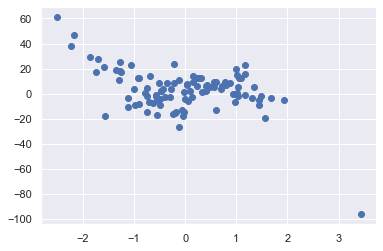

In [44]:
np.random.seed(102)
x = np.random.randn(100)
y = x + 2 * (x ** 2) -3 * (x ** 3) + 5*np.random.normal(0,2,100)
plt.scatter(x,y)
plt.show()

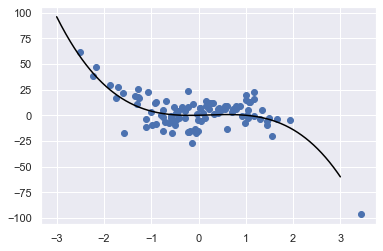

In [45]:
plt.scatter(x,y)
# let's add the unobservable true model
w=np.linspace(-3,3,500)
z= w+2 * (w ** 2) -3 * (w ** 3)
plt.plot(w,z, c='black')
plt.show()

###  Polynomial transformation of the data

In [117]:
poly = PolynomialFeatures(degree =5)

In [118]:
type(x)
x[0:5]

array([ 1.6680683 ,  0.92586182,  1.05799677, -0.92033901,  1.29974847])

In [119]:
x.reshape(-1,1) [0:5]
# this is equivalent to x.reshape(100,1)[0:5]

array([[ 1.6680683 ],
       [ 0.92586182],
       [ 1.05799677],
       [-0.92033901],
       [ 1.29974847]])

In [120]:
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339


###  Splitting the data

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=100)

In [122]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     10.60
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           1.93e-07
Time:                        16:01:31   Log-Likelihood:                -260.10
No. Observations:                  70   AIC:                             532.2
Df Residuals:                      64   BIC:                             545.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.2682      2.153     -0.125      0.901      -4.569       4.032
1              9.4036      4.175      2.253      0.028       1.064      17.743
2              5.5066      3.760      1.464      0.148      -2.005      13.019
3             -9.6844      4.246     -2.281      0.026     -18.167      -1.201
4             -0.5512      1.104     -0.499      0.619      -2.757       1.654
5              1.0749      0.883      1.217      0.228      -0.689       2.839
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.221
Skew:                          -0.122   Prob(JB):                        0.895
Kurtosis:                       2.871   Cond. No.                         55.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting the train data regression function

In [123]:
y_predict_tr = model.predict(X_train)
type(y_predict_tr)

pandas.core.series.Series

In [124]:
prediction_tr =pd.DataFrame(np.c_[X_train[1],y_predict_tr], columns=['x','y_predict'])
prediction_tr.head()

,x,y_predict
0,0.997190,5.496561
1,-0.509845,-2.422044
2,-0.920339,2.185719
3,-0.484928,-2.488384
4,-0.794300,0.030563


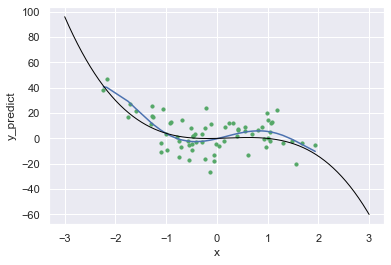

In [125]:
# plotting the fitted line vs true (unobservable) line.
sns.lineplot(x='x',y='y_predict', data=prediction_tr)
plt.scatter(X_train[1], y_train, s=10, c='g')
plt.plot(w,z, c='black', linewidth=1)

plt.show()

###  comparing the MSE_train and MSE_test

In [126]:
y_predict_tr = model.predict(X_train)
MSE_train = np.mean(np.square(y_train - y_predict_tr))
round(MSE_train,2)

98.84

In [127]:
y_predict_te = model.predict(X_test)
MSE_test = np.mean(np.square(y_test - y_predict_te))
round(MSE_test,2)

1987.51

### All in one function

In [128]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split




def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = sm.OLS(y_train, X_train).fit()
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)
    R2_train = round(poly_model.rsquared,2)
    Adj_R2_train = round(poly_model.rsquared_adj,2)
  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
   # print("Traning model fit")
   # print("R2_train = {}".format(R2_train))
   # print("adj R2 = {}".format(Adj_R2_train))
    
   # print("-------------------------------------------")
   # print("MSE_train = {}".format(MSE_train))
   # print("RMSE_train = {}".format(RMSE_train))

   # print("-------------------------------------------")
   # print("MSE_test = {}".format(MSE_test))
   # print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, MSE_train, MSE_test, RMSE_train, RMSE_test

    


In [129]:
X_poly.head()
#X_poly[1]

,0,1,2,3,4,5
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339


In [130]:
my_polynomial_regression(5,np.array(X_poly[1]).reshape(-1,1),y)

(5, 98.84, 1987.51, 9.94, 44.58)

In [131]:
my_polynomial_regression(poly_degree=1, X=x, y=y)
# remember: x should be a series and y is your target variable in the whole data set. 

(1, 160.07, 430.32, 12.65, 20.74)

In [132]:
returns

[(1, 160.07, 430.32, 12.65, 20.74),
 (2, 128.2, 849.49, 11.32, 29.15),
 (3, 104.91, 104.11, 10.24, 10.2),
 (4, 101.12, 1119.15, 10.06, 33.45),
 (5, 98.84, 1987.51, 9.94, 44.58),
 (6, 96.92, 63427.8, 9.84, 251.85)]

In [133]:
returns= []
for i in range(1,7):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree','MSE_train', 'MSE_test', 'RMSE_train', 'RMSE_test'])
output

,Degree,MSE_train,MSE_test,RMSE_train,RMSE_test
0,1,160.07,430.32,12.65,20.74
1,2,128.20,849.49,11.32,29.15
2,3,104.91,104.11,10.24,10.20
3,4,101.12,1119.15,10.06,33.45
4,5,98.84,1987.51,9.94,44.58
5,6,96.92,63427.80,9.84,251.85


###  Finding the optimal polynomial degree : Elbow method

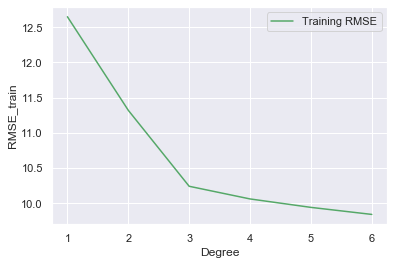

In [134]:
sns.lineplot(x='Degree', y='RMSE_train', data=output , color='g', label="Training RMSE")
plt.show()

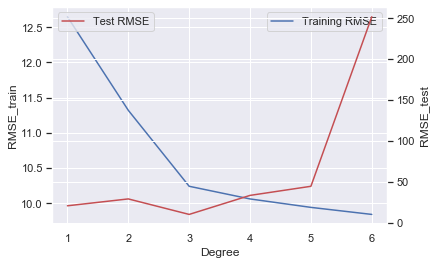

In [135]:
sns.lineplot(x='Degree', y='RMSE_train', data=output , color='b', label="Training RMSE")
ax2 = plt.twinx()
sns.lineplot(x='Degree', y='RMSE_test', data=output  ,color='r', label="Test RMSE", ax=ax2)

# Cross validation 

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [137]:
model = LinearRegression()

In [138]:
NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )
# cv is the number of Folds. To speed up the process you can set the n_jobs=-1
# to see the list of valid scorings try:sorted(sklearn.metrics.SCORERS.keys())

In [139]:
X_train.head()

,0,1,2,3,4,5
32,1.0,0.997190,0.994387,0.991593,0.988806,0.986027
6,1.0,-0.509845,0.259942,-0.132530,0.067570,-0.034450
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
12,1.0,-0.484928,0.235155,-0.114033,0.055298,-0.026815
51,1.0,-0.794300,0.630913,-0.501134,0.398051,-0.316172


In [140]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Exercise: Why do you think the scoring is "negative MSE" instead of "MSE"?

In [141]:
NMSE

array([-110.21236405,  -94.26943861, -454.20321642, -156.387272  ,
        -84.96548085, -234.76610844,  -92.31163064,  -44.37653192,
        -55.46621079, -178.73365102])

In [142]:
MSE= np.mean(-NMSE)
MSE

150.5691904754522

In [143]:
RMSE = np.sqrt(-NMSE)
RMSE

array([10.49820766,  9.70924501, 21.31204393, 12.50548967,  9.2176722 ,
       15.32207912,  9.60789418,  6.66157128,  7.44756408, 13.36913053])

In [144]:
RMSE.mean()

11.565089766333518

In [145]:
RMSE.std()

4.1009619813038904

### Exercise: What if you wanted to pass a variable of your data frame to x?
for example you have a data frame with these features (age, education, exper) and you wanted to pass age to x. 
Let's do this exercise with X_poly

In [150]:
my_polynomial_regression(poly_degree=2, X=X_poly[1], y=y)
# hmmm: what's going on?

AttributeError: 'Series' object has no attribute 'reshape'

In [149]:
# let's explore the X_poly
X_poly.head()

# we are interested in X_poly[1]

,0,1,2,3,4,5
0,1.0,1.668068,2.782452,4.641320,7.742038,12.914249
1,1.0,0.925862,0.857220,0.793667,0.734826,0.680348
2,1.0,1.057997,1.119357,1.184276,1.252960,1.325628
3,1.0,-0.920339,0.847024,-0.779549,0.717449,-0.660297
4,1.0,1.299748,1.689346,2.195725,2.853890,3.709339


In [87]:
type(X_poly[1])
# that's the problem! We have to make sure that we are passing a np.array to our polynomial function. 

pandas.core.series.Series

In [88]:
# This is how we should do it:
my_polynomial_regression(poly_degree=2, X=np.array(X_poly[1]), y=y)

(2, 128.2, 849.49, 11.32, 29.15)

### Exercise: Plot the test MSE using 5-fold cross validation.

In [153]:
list(range(1,7))

[1, 2, 3, 4, 5, 6]

In [163]:
# Fil in the blanks!

MSE_test =[]
iterator= range(1,8) # the second number is polynomial degree -1
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(x.reshape(-1,1)), y, test_size=0.3, random_state=100)
    MSE_test.append(-cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" ).mean())   
    
    
output = pd.DataFrame(list(iterator), columns=['Poly degree'])
output['MSE_test']=MSE_test
output

,Poly degree,MSE_test
0,1,177.356971
1,2,162.255726
2,3,119.164446
3,4,136.666608
4,5,112.839278
5,6,113.550633
6,7,253.843422


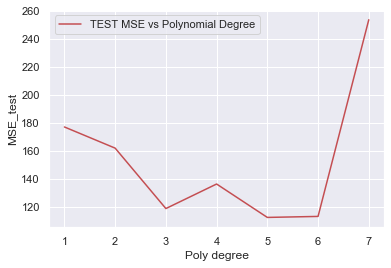

In [164]:
sns.lineplot(x='Poly degree', y='MSE_test', data=output , color='r', label="TEST MSE vs Polynomial Degree")
plt.show()

###  Additional links:
1- Underfitting vs Overfitting: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

2- Going beyond linearity in python: https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

3- Validation set approach: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html
4- How to concat data frames: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html